In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno

In [12]:
original_data = pd.read_csv('sepsis_data.psv', sep ='|')

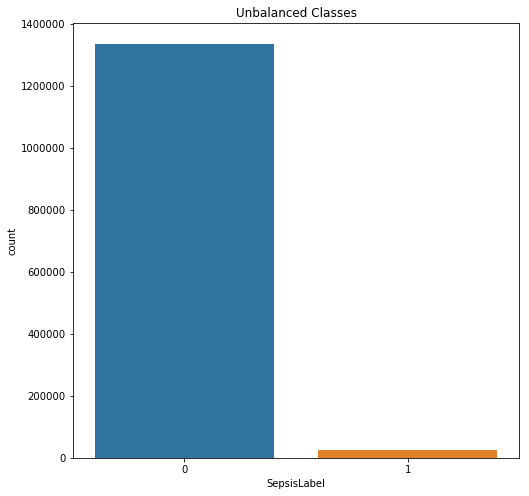

In [32]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=original_data)
plt.title('Unbalanced Classes')
plt.show()

### Method 1 : Undersampling

In [13]:
shuffled_df = original_data.sample(frac=1,random_state=4)

In [14]:
shuffled_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
433807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,74.49,1,0.0,1.0,-27.76,1,0
484701,88.0,99.0,NaN,110.0,68.67,NaN,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.11,0,NaN,NaN,-39.18,27,0
611917,81.0,96.0,NaN,136.0,81.50,61.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.91,0,NaN,NaN,-0.03,26,0
844725,80.0,100.0,37.10,160.0,85.00,61.0,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,49.00,1,0.0,1.0,-0.04,31,0
569786,47.0,93.0,NaN,116.0,74.00,55.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,81.50,1,0.0,1.0,-0.02,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639432,75.0,97.0,NaN,149.0,98.00,NaN,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.61,0,NaN,NaN,-0.03,8,0
653672,80.0,97.0,NaN,139.0,90.33,NaN,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,35.32,1,1.0,0.0,-0.02,8,0
120705,106.0,100.0,37.94,112.0,72.00,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,63.32,0,1.0,0.0,-0.03,26,0
991406,96.0,95.0,NaN,104.0,76.00,60.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,68.00,0,0.0,1.0,-175.63,81,0


In [17]:
sepsis_df = shuffled_df.loc[shuffled_df['SepsisLabel'] == 1]

In [19]:
sepsis_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
104016,71.0,100.0,NaN,NaN,83.0,NaN,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,75.59,0,1.0,0.0,-3.46,7,1
959899,130.5,95.0,NaN,131.5,86.5,62.0,4.5,NaN,NaN,NaN,...,NaN,NaN,NaN,62.00,1,1.0,0.0,0.00,5,1
1345773,90.0,93.0,NaN,151.0,87.0,67.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,73.00,1,NaN,NaN,-142.97,19,1
1005026,87.0,98.0,37.70,98.0,77.0,55.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,29.00,0,0.0,1.0,-0.03,8,1
49408,103.0,100.0,37.50,110.0,76.0,57.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.70,0,NaN,NaN,-150.11,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616335,107.0,95.0,NaN,NaN,77.0,NaN,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,82.82,1,NaN,NaN,-0.02,74,1
1019097,126.0,95.0,NaN,78.0,68.0,63.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,43.00,0,1.0,0.0,-324.67,17,1
677082,89.0,95.0,37.17,169.0,104.0,72.0,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,82.24,0,NaN,NaN,-87.39,136,1
1310090,130.0,93.0,NaN,88.0,71.0,65.0,NaN,34.0,NaN,NaN,...,NaN,NaN,NaN,68.00,0,1.0,0.0,-8.36,199,1


In [28]:
non_sepsis_df = shuffled_df.loc[shuffled_df['SepsisLabel'] == 0].sample(n=25015,random_state=42)


In [29]:
normalized_df = pd.concat([sepsis_df, non_sepsis_df])

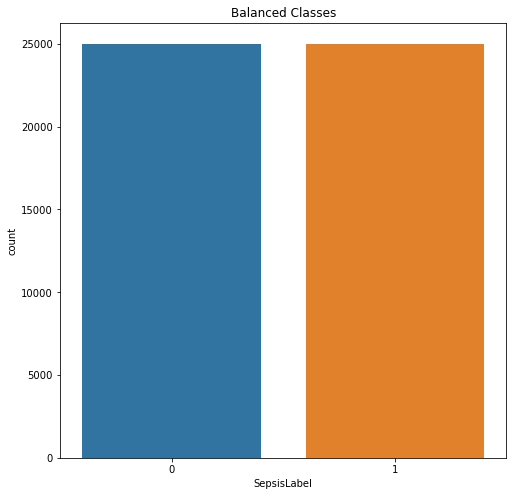

In [63]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

### Method 2: Oversampling

In [33]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [34]:
sm = SMOTE(sampling_strategy='minority', random_state=7)

### Make new data 

In [72]:
training_data = pd.read_csv('export_dataframe.csv')

In [73]:
training_data.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,0,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.03,1,0
1,0,old,normal,Missing,Missing,normal,normal,Missing,Missing,-0.03,2,0
2,0,old,normal,Missing,Missing,abnormal,normal,Missing,Missing,-0.03,3,0
3,0,old,normal,Missing,Missing,abnormal,Missing,Missing,Missing,-0.03,4,0
4,0,old,abnormal,Missing,Missing,abnormal,normal,normal,abnormal,-0.03,5,0


In [74]:
training_data.shape

(1361664, 12)

In [77]:
shuffled_df_over = training_data.sample(frac=1,random_state=7)
shuffled_df_over

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
1262944,0,adult,missing,normal,normal,abnormal,normal,Missing,Missing,-11.26,2,0
1199022,1,adult,missing,Missing,Missing,normal,normal,Missing,Missing,-243.78,17,0
733766,1,old,missing,normal,Missing,abnormal,normal,normal,Missing,-133.94,7,0
784532,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.03,19,0
120119,1,old,missing,Missing,Missing,normal,abnormal,Missing,Missing,0.00,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...
839891,0,old,normal,normal,Missing,abnormal,abnormal,Missing,Missing,-0.49,18,0
535030,1,adult,normal,abnormal,Missing,normal,normal,Missing,Missing,-234.94,19,0
573977,0,old,normal,abnormal,high,abnormal,abnormal,normal,abnormal,-0.03,16,1
1238212,1,old,missing,normal,Missing,abnormal,abnormal,Missing,Missing,-216.10,12,0


In [78]:
sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 1]
sepsis_df_over

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
516424,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.05,52,1
25538,1,old,normal,Missing,Missing,abnormal,abnormal,Missing,Missing,-290.37,31,1
646667,1,old,missing,abnormal,Missing,abnormal,normal,Missing,Missing,-283.06,205,1
114734,1,adult,normal,Missing,Missing,abnormal,normal,Missing,abnormal,-0.02,59,1
572747,0,old,abnormal,Missing,Missing,abnormal,normal,Missing,Missing,-67.53,276,1
...,...,...,...,...,...,...,...,...,...,...,...,...
308990,1,old,missing,Missing,Missing,normal,abnormal,Missing,Missing,-0.02,10,1
409373,1,old,normal,Missing,Missing,abnormal,normal,abnormal,Missing,-0.04,107,1
1289339,1,adult,missing,Missing,normal,normal,normal,Missing,abnormal,0.00,60,1
351148,1,old,normal,Missing,Missing,abnormal,abnormal,Missing,Missing,-0.03,19,1


In [79]:
non_sepsis_df_over = shuffled_df_over.loc[shuffled_df_over['SepsisLabel'] == 0].sample(n=25015,random_state=40)


In [80]:
normalized_df_over = pd.concat([sepsis_df_over, non_sepsis_df_over])

In [84]:
normalized_df_over

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
516424,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.05,52,1
25538,1,old,normal,Missing,Missing,abnormal,abnormal,Missing,Missing,-290.37,31,1
646667,1,old,missing,abnormal,Missing,abnormal,normal,Missing,Missing,-283.06,205,1
114734,1,adult,normal,Missing,Missing,abnormal,normal,Missing,abnormal,-0.02,59,1
572747,0,old,abnormal,Missing,Missing,abnormal,normal,Missing,Missing,-67.53,276,1
...,...,...,...,...,...,...,...,...,...,...,...,...
329580,1,adult,normal,Missing,Missing,normal,Missing,Missing,Missing,-0.02,48,0
1236530,1,adult,normal,normal,Missing,normal,normal,abnormal,abnormal,-0.15,18,0
84531,1,old,abnormal,Missing,normal,normal,normal,normal,Missing,-1.95,20,0
397863,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-2.63,35,0


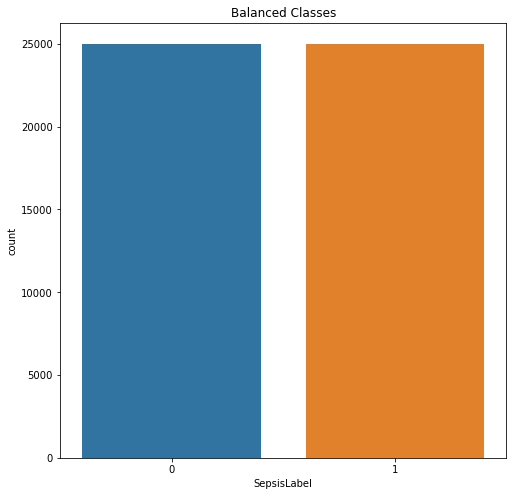

In [85]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=normalized_df_over)
plt.title('Balanced Classes')
plt.show()

In [86]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361664 entries, 0 to 1361663
Data columns (total 12 columns):
Gender         1361664 non-null int64
new_age        1361664 non-null object
new_o2sat      1361664 non-null object
new_temp       1361664 non-null object
new_bp         1361664 non-null object
new_resp       1361664 non-null object
new_map        1361664 non-null object
new_fio2       1361664 non-null object
new_hr         1361664 non-null object
HospAdmTime    1361664 non-null float64
ICULOS         1361664 non-null int64
SepsisLabel    1361664 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 124.7+ MB


In [87]:
for col in training_data.columns.values:
    # Encoding only categorical variables
    if training_data[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=training_data[col]
        le.fit(data.values)
        training_data[col]=le.transform(training_data[col])
        

In [88]:
training_data.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,0,1,1,0,0,1,0,0,0,-0.03,1,0
1,0,1,2,0,0,2,2,0,0,-0.03,2,0
2,0,1,2,0,0,0,2,0,0,-0.03,3,0
3,0,1,2,0,0,0,0,0,0,-0.03,4,0
4,0,1,0,0,0,0,2,2,1,-0.03,5,0


In [90]:
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(training_data.drop('SepsisLabel', axis=1), training_data['SepsisLabel'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df_over.columns


oversampled_train.columns

Index(['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp',
       'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

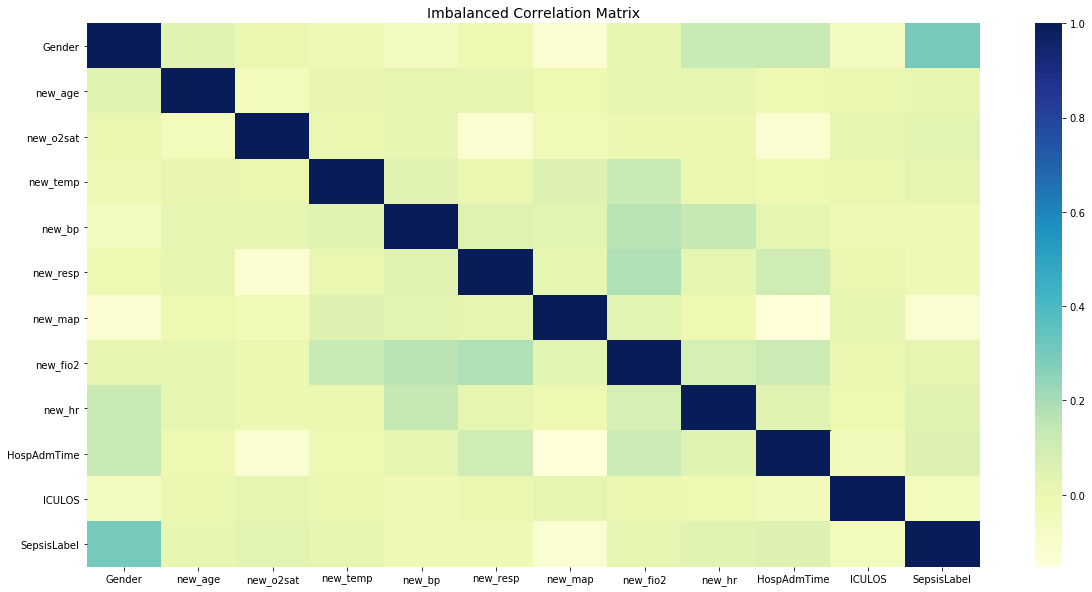

In [91]:
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()